In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Social_network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
import seaborn as sns

<Axes: >

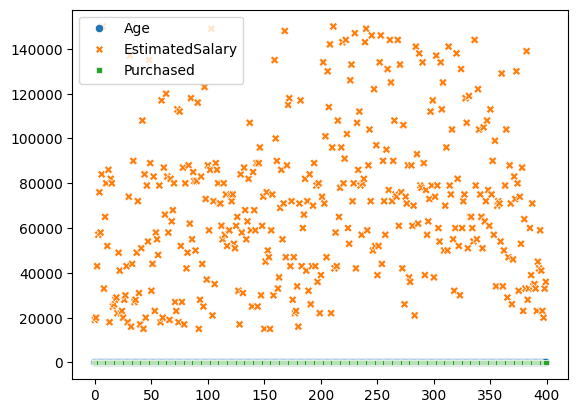

In [9]:
sns.scatterplot(df)

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(128,activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3684 - loss: 1972.2656 - val_accuracy: 0.6000 - val_loss: 895.6453
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6744 - loss: 488.2171 - val_accuracy: 0.4000 - val_loss: 316.1529
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4500 - loss: 193.0204 - val_accuracy: 0.4000 - val_loss: 34.9143
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5442 - loss: 54.9559 - val_accuracy: 0.6000 - val_loss: 173.6452
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6170 - loss: 127.7299 - val_accuracy: 0.6000 - val_loss: 108.2588
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6706 - loss: 142.1059 - val_accuracy: 0.4000 - val_loss: 132.0579
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4948 - loss: 90.5083 - val_accuracy: 0.6000 - val_loss: 27.2471
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6105 - loss: 

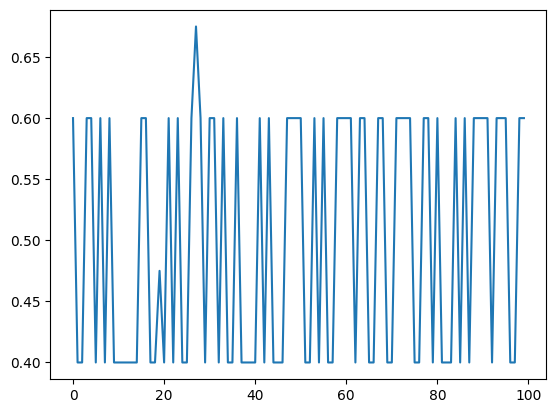

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train_scacled = scaler.fit_transform(X_train)
X_test_scacled = scaler.fit_transform(X_test)

In [25]:
model = Sequential()

model.add(Dense(128,activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

d:\DL\100-days-DL_CampusX\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train_scacled,y_train, validation_data=(X_test_scacled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5040 - loss: 0.6921 - val_accuracy: 0.8250 - val_loss: 0.6445
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8609 - loss: 0.6339 - val_accuracy: 0.8000 - val_loss: 0.5905
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8355 - loss: 0.5794 - val_accuracy: 0.7875 - val_loss: 0.5440
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8195 - loss: 0.5378 - val_accuracy: 0.7875 - val_loss: 0.5043
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8034 - loss: 0.5084 - val_accuracy: 0.7875 - val_loss: 0.4705
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8693 - loss: 0.4724 - val_accuracy: 0.8000 - val_loss: 0.4410
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8715 - loss: 0.4446 - val_accuracy: 0.8250 - val_loss: 0.4169
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8619 - loss: 0.4201 - val_accuracy: 0.

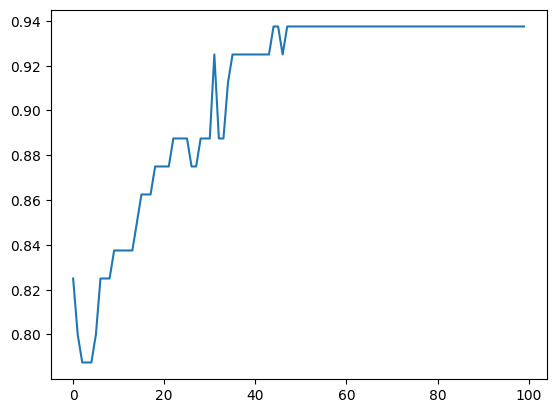

: 

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])